In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data =pd.read_csv("Data.csv")

In [3]:
data.head(15)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,Carry out & Take away,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [6]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variable:", len(object_cols))

int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer Variable:", len(num_cols))

Categorical Variable: 17
Integer Variable: 8


In [7]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
passanger                0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
temperature              0.000000
weather                  0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [8]:
data=data.drop('car', axis=1)

In [9]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [10]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

CoffeeHouse             1.710817
Restaurant20To50        1.490066
CarryAway               1.190476
RestaurantLessThan20    1.024913
Bar                     0.843582
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
temperature             0.000000
weather                 0.000000
Accept(Y/N?)            0.000000
dtype: float64

In [11]:
data = data.dropna()

In [12]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

destination             0.0
passanger               0.0
direction_opp           0.0
direction_same          0.0
toCoupon_GEQ25min       0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ5min        0.0
Restaurant20To50        0.0
RestaurantLessThan20    0.0
CarryAway               0.0
CoffeeHouse             0.0
Bar                     0.0
income                  0.0
occupation              0.0
education               0.0
has_children            0.0
maritalStatus           0.0
age                     0.0
gender                  0.0
expiration              0.0
coupon                  0.0
temperature             0.0
weather                 0.0
Accept(Y/N?)            0.0
dtype: float64

In [13]:
for i in data.select_dtypes("O").columns:
    print("#######################\n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################

destination


No Urgent Place    5970
Home               3085
Work               3024
Name: destination, dtype: int64
#######################

passanger


Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: passanger, dtype: int64
#######################

weather


Sunny    9601
Snowy    1331
Rainy    1147
Name: weather, dtype: int64
#######################

coupon


Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64
#######################

expiration


1d    6760
2h    5319
Name: expiration, dtype: int64
#######################

gender


Female    6199
Male      5880
Name: gender, dtype: int64
#######################

age


21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: age, dtype: int64
#######################

maritalStatu

<Figure size 1600x600 with 0 Axes>

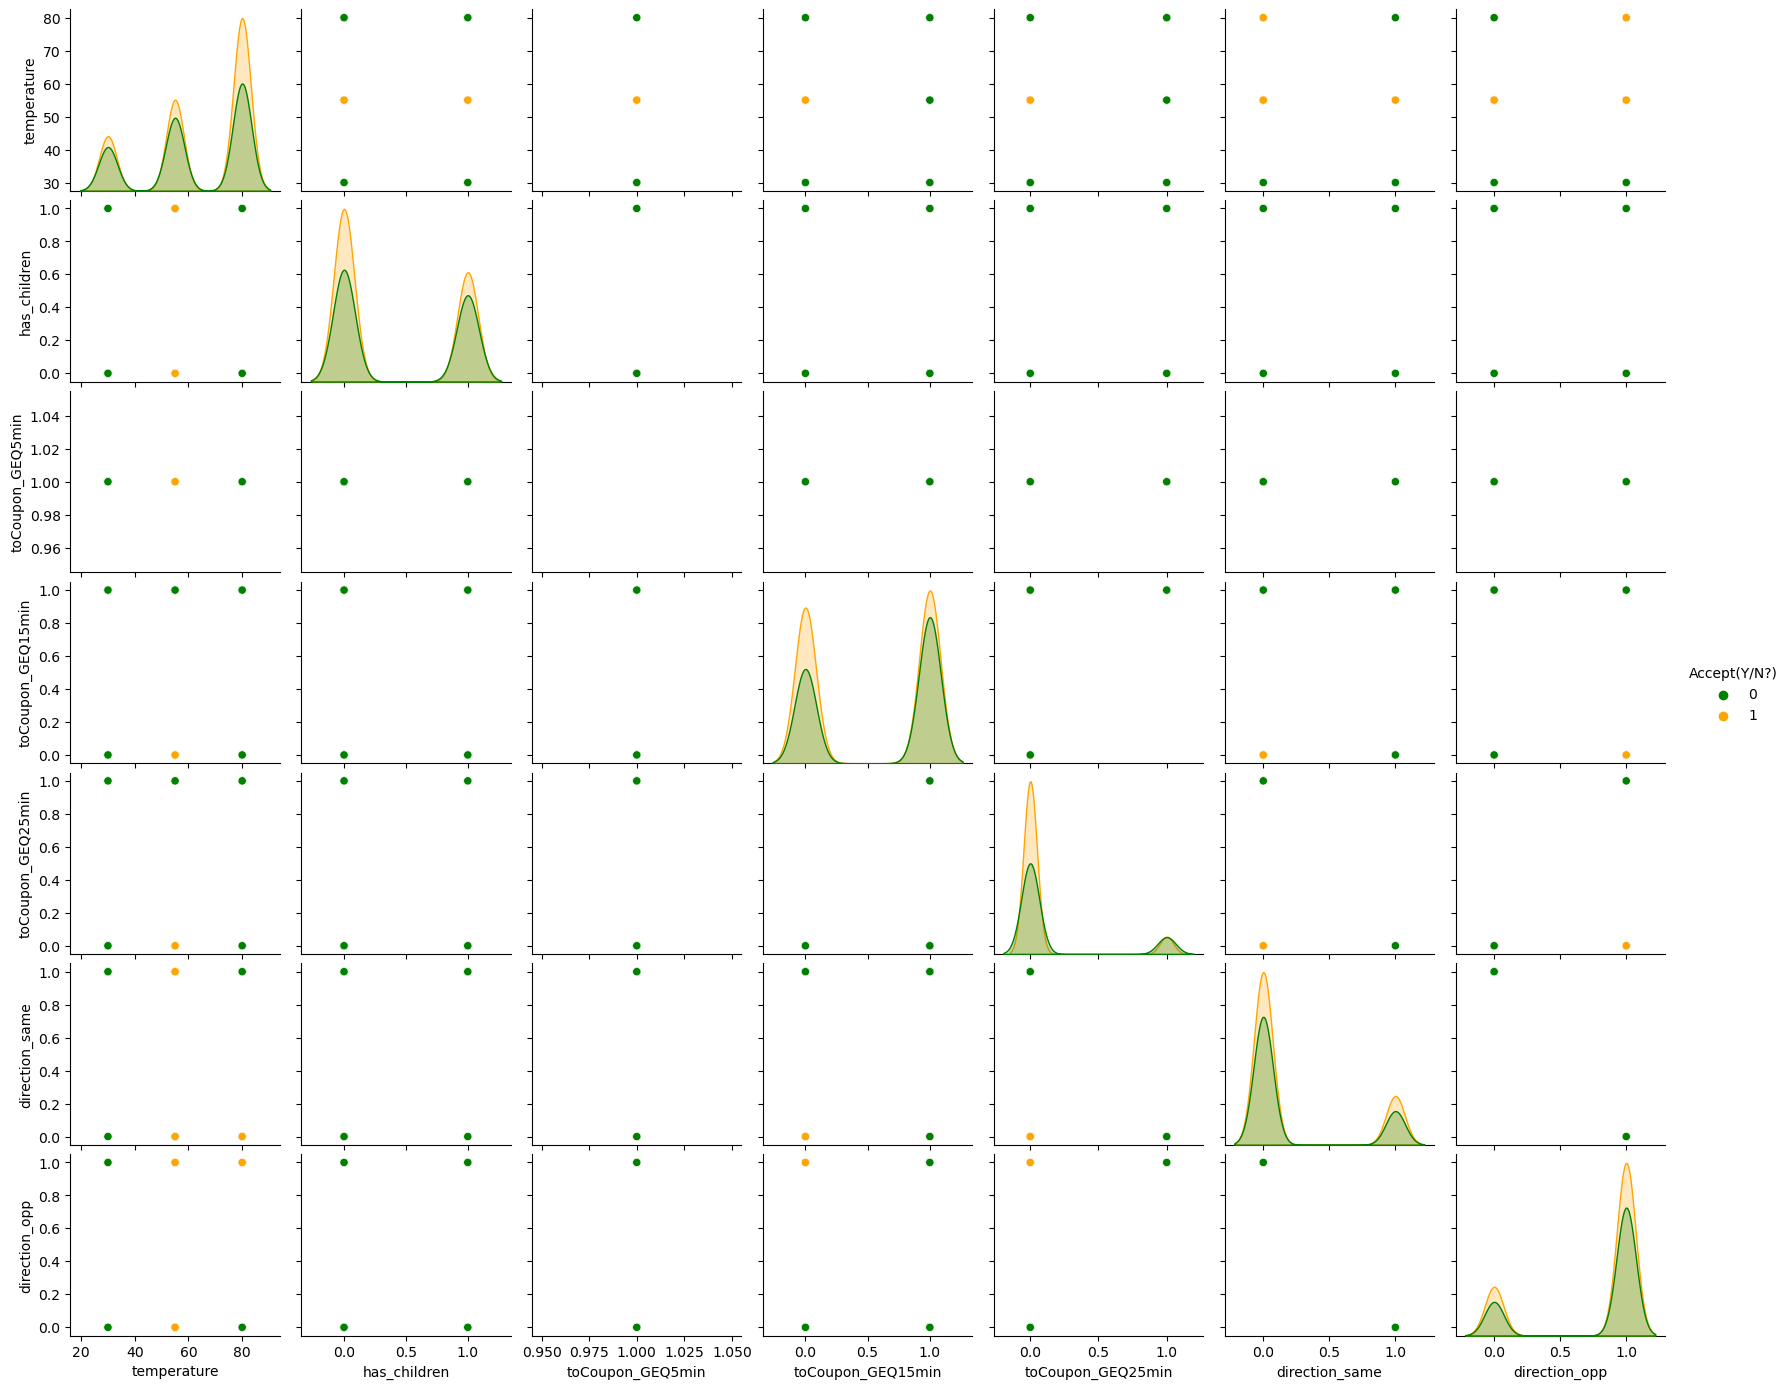

In [14]:
plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette(["green", "orange"]))
sns.pairplot(data, hue='Accept(Y/N?)')
fig=plt.gcf()
fig.set_size_inches(18,14)
#plt.show()

In [15]:
data.expiration.replace({'1d':'24h'}, inplace=True)

In [16]:
data.expiration.value_counts()

24h    6760
2h     5319
Name: expiration, dtype: int64

In [17]:
data.Bar.value_counts()

never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: Bar, dtype: int64

In [18]:
data.destination.replace({'No Urgent Place':'NoUrgentPlace'}, inplace=True)

In [19]:
data.Bar.replace({'1~3' : '1 to 3'}, inplace=True)
data.Bar.replace({'4~8' : '4 to 8'}, inplace=True)
data.Bar.replace({'gt8' : 'Greater then 8'}, inplace=True)

In [20]:
data.Bar.value_counts()

never             4934
less1             3394
1 to 3            2370
4 to 8            1054
Greater then 8     327
Name: Bar, dtype: int64

In [21]:
data.CoffeeHouse.replace({'1~3' : '1 to 3'}, inplace=True)
data.CoffeeHouse.replace({'4~8' : '4 to 8'}, inplace=True)
data.CoffeeHouse.replace({'gt8' : 'Greater then 8'}, inplace=True)


In [22]:
data.CoffeeHouse.value_counts()

less1             3298
1 to 3            3159
never             2852
4 to 8            1659
Greater then 8    1111
Name: CoffeeHouse, dtype: int64

In [23]:
data.CarryAway.replace({'1~3' : '1 to 3'}, inplace=True)
data.CarryAway.replace({'4~8' : '4 to 8'}, inplace=True)
data.CarryAway.replace({'gt8' : 'Greater then 8'}, inplace=True)


In [24]:
data.RestaurantLessThan20.replace({'1~3' : '1 to 3'}, inplace=True)
data.RestaurantLessThan20.replace({'4~8' : '4 to 8'}, inplace=True)
data.RestaurantLessThan20.replace({'gt8' : 'Greater then 8'}, inplace=True)


In [25]:
data.Restaurant20To50.replace({'1~3' : '1 to 3'}, inplace=True)
data.Restaurant20To50.replace({'4~8' : '4 to 8'}, inplace=True)
data.Restaurant20To50.replace({'gt8' : 'Greater then 8'}, inplace=True)


In [26]:
data.Restaurant20To50.value_counts()

less1             5859
1 to 3            3202
never             2070
4 to 8             684
Greater then 8     264
Name: Restaurant20To50, dtype: int64

In [27]:
data.rename(columns={'Accept(Y/N?)' :'Accept'}, inplace=True)

In [28]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

In [29]:
def univariate_analysis(column_name):
    data_EDA = pd.DataFrame(sorted(list(data[column_name].unique())), columns=[column_name])
    data_EDA['Total_count'] = list(data.groupby(column_name).Accept.count())
    data_EDA['Accepted'] = list(data[data.Accept==1].groupby(column_name).Accept.count())
    data_EDA['Rejected'] = list(data[data.Accept==0].groupby(column_name).Accept.count())
    data_EDA['% of Accepted'] = round(data_EDA['Accepted']/data_EDA['Total_count']*100,3)
    data_EDA['% of Rejected'] = round(data_EDA['Rejected']/data_EDA['Total_count']*100,3)
    data_EDA=data_EDA.sort_values(by='Total_count', ascending=False )
    return data_EDA

In [30]:
univariate_analysis('destination')

,destination,Total_count,Accepted,Rejected,% of Accepted,% of Rejected
1,NoUrgentPlace,5970,3785,2185,63.400,36.600
0,Home,3085,1568,1517,50.827,49.173
2,Work,3024,1524,1500,50.397,49.603


In [31]:
univariate_analysis('passanger')

,passanger,Total_count,Accepted,Rejected,% of Accepted,% of Rejected
0,Alone,6969,3673,3296,52.705,47.295
1,Friend(s),3148,2129,1019,67.630,32.370
3,Partner,1024,609,415,59.473,40.527
2,Kid(s),938,466,472,49.680,50.320


In [32]:
univariate_analysis('weather')

,weather,Total_count,Accepted,Rejected,% of Accepted,% of Rejected
2,Sunny,9601,5713,3888,59.504,40.496
1,Snowy,1331,634,697,47.633,52.367
0,Rainy,1147,530,617,46.207,53.793


In [35]:
univariate_analysis('temperature')

,temperature,Total_count,Accepted,Rejected,% of Accepted,% of Rejected
2,80,6222,3731,2491,59.965,40.035
1,55,3662,1967,1695,53.714,46.286
0,30,2195,1179,1016,53.713,46.287


In [34]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

In [36]:
univariate_analysis('gender')

,gender,Total_count,Accepted,Rejected,% of Accepted,% of Rejected
0,Female,6199,3394,2805,54.751,45.249
1,Male,5880,3483,2397,59.235,40.765


In [37]:
univariate_analysis('occupation')

,occupation,Total_count,Accepted,Rejected,% of Accepted,% of Rejected
24,Unemployed,1814,990,824,54.576,45.424
22,Student,1497,911,586,60.855,39.145
5,Computer & Mathematical,1368,771,597,56.360,43.640
21,Sales & Related,1072,604,468,56.343,43.657
7,Education&Training&Library,855,439,416,51.345,48.655
15,Management,772,458,314,59.326,40.674
16,Office & Administrative Support,617,372,245,60.292,39.708
1,Arts Design Entertainment Sports & Media,564,301,263,53.369,46.631
3,Business & Financial,516,294,222,56.977,43.023
20,Retired,473,216,257,45.666,54.334


<AxesSubplot:xlabel='destination', ylabel='count'>

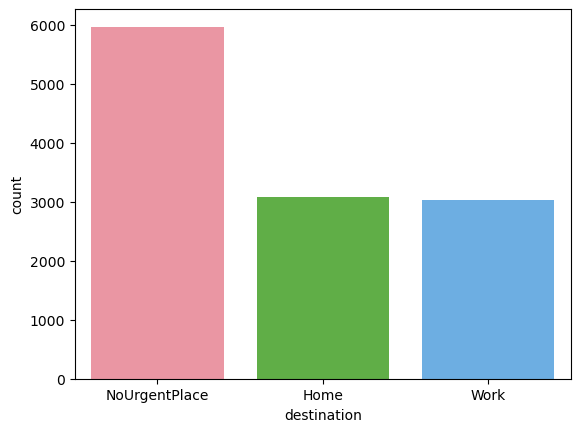

In [38]:
sns.countplot(data=data, x='destination')

<AxesSubplot:xlabel='destination', ylabel='count'>

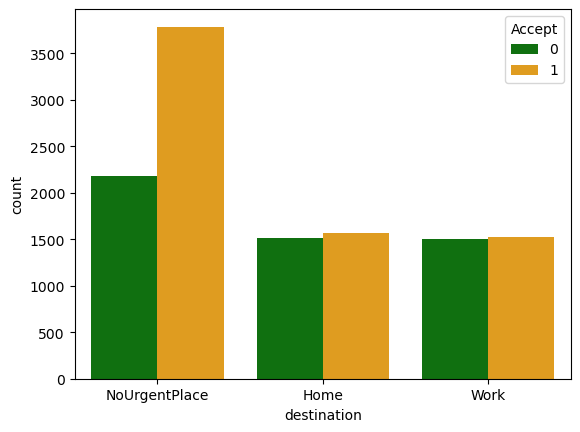

In [39]:
sns.countplot(data=data, x='destination', hue='Accept')

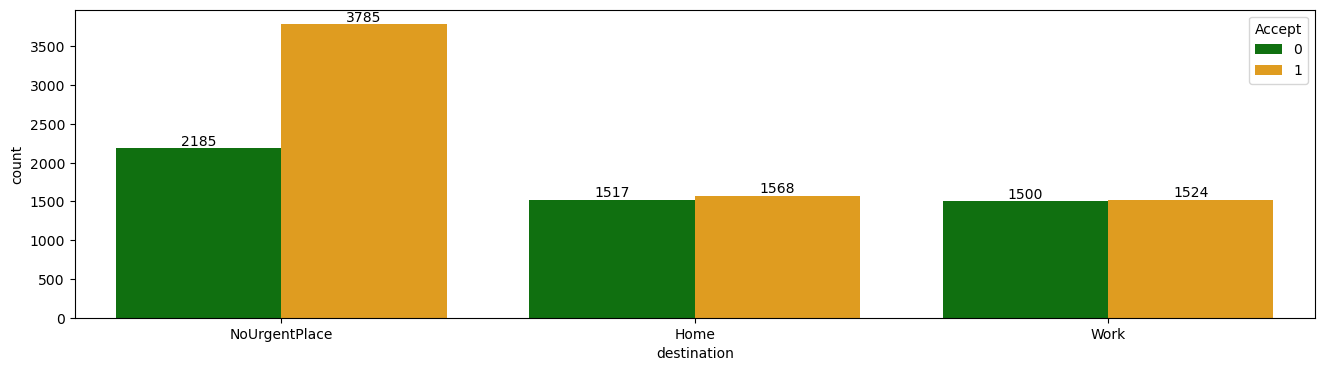

In [41]:
plt.figure(figsize=(16,4))
ax=sns.countplot(x='destination', hue='Accept', data= data)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [42]:
import ydata_profiling as yp

profile = yp.ProfileReport(data)

profile.to_file('profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]